In [1]:
import tensorflow as tf

In [3]:
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [5]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [6]:
X_train/=255
X_test/=255

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [9]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
          

C:\Anaconda3\envs\aimj\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9389 - loss: 0.2054
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 30ms/step - accuracy: 0.9735 - loss: 0.0859
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 37ms/step - accuracy: 0.9810 - loss: 0.0598
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9855 - loss: 0.0444
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.9874 - loss: 0.0383
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.9894 - loss: 0.0306
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.9904 - loss: 0.0272
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9929 - loss: 0.0209
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.9934 - loss: 0.0196
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.9930 - loss: 0.0195


In [11]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9833 - loss: 0.0668


[0.06681766360998154, 0.983299970626831]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
6


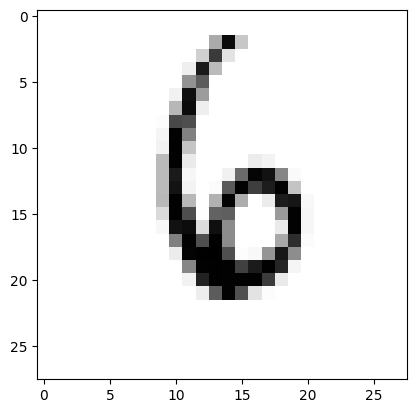

In [12]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
predict = X_test[image_index].reshape(28,28)
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
import numpy as np

In [17]:
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [19]:



y_pred_classes[7]

9

In [20]:
y_true_classes[7]

9

In [18]:
y_true_classes = y_test 

In [21]:
con_mat = confusion_matrix(y_true_classes, y_pred_classes)

In [22]:
con_mat

array([[ 967,    0,    1,    1,    1,    1,    3,    1,    3,    2],
       [   0, 1127,    1,    3,    0,    0,    2,    1,    1,    0],
       [   2,    6,  995,    8,    1,    1,    1,   13,    5,    0],
       [   0,    0,    0, 1000,    0,    4,    0,    5,    1,    0],
       [   1,    0,    0,    0,  973,    0,    2,    0,    0,    6],
       [   3,    0,    0,    9,    0,  877,    2,    0,    0,    1],
       [   2,    1,    0,    1,    2,    3,  944,    0,    5,    0],
       [   2,    2,    6,    0,    0,    0,    0, 1008,    3,    7],
       [   2,    0,    1,    6,    2,    4,    0,    3,  950,    6],
       [   1,    1,    0,    2,    6,    2,    0,    4,    1,  992]],
      dtype=int64)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

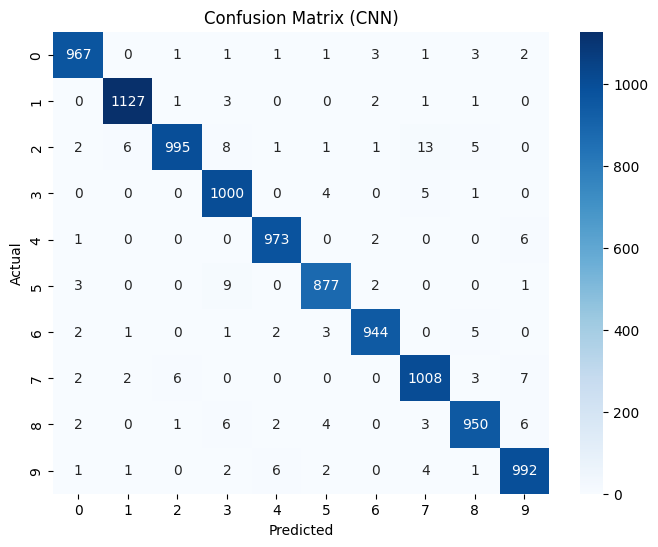

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns